In [1]:
import numpy as np

def merton_jump_diffusion(S0, mu, sigma, lamb, jump_mean, jump_sd, T, N):
    dt = T / N
    S = np.zeros(N + 1)
    S[0] = S0
    for i in range(1, N + 1):
        Z = np.random.normal(0, 1)
        J = np.random.normal(jump_mean, jump_sd) if np.random.poisson(lamb * dt) > 0 else 0
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z + J)
    return S


In [2]:
def price_option(S0, K, mu, sigma, lamb, jump_mean, jump_sd, T, N, M, option_type="call"):
    payoffs = np.zeros(M)
    for i in range(M):
        S = merton_jump_diffusion(S0, mu, sigma, lamb, jump_mean, jump_sd, T, N)
        if option_type == "call":
            payoffs[i] = max(S[-1] - K, 0)
        else:
            payoffs[i] = max(K - S[-1], 0)
    return np.mean(payoffs) * np.exp(-mu * T)


In [3]:
from scipy.stats import norm

def black_scholes(S0, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        return S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)


In [4]:
# Parameters
S0 = 100       # Initial stock price
K = 100        # Strike price
T = 1          # Time to maturity in years
r = 0.05       # Risk-free rate
sigma = 0.2    # Volatility
lamb = 0.75    # Jump intensity (lambda)
jump_mean = -0.1   # Mean of the jump size
jump_sd = 0.3      # Standard deviation of the jump size
N = 252        # Number of time steps
M = 10000      # Number of Monte Carlo simulations

# Merton Jump Diffusion Option Price
merton_price = price_option(S0, K, r, sigma, lamb, jump_mean, jump_sd, T, N, M, option_type="call")
print(f"Merton Jump Diffusion Model Option Price: {merton_price:.2f}")

# Black-Scholes Option Price for Comparison
bs_price = black_scholes(S0, K, T, r, sigma, option_type="call")
print(f"Black-Scholes Model Option Price: {bs_price:.2f}")


Merton Jump Diffusion Model Option Price: 12.36
Black-Scholes Model Option Price: 10.45


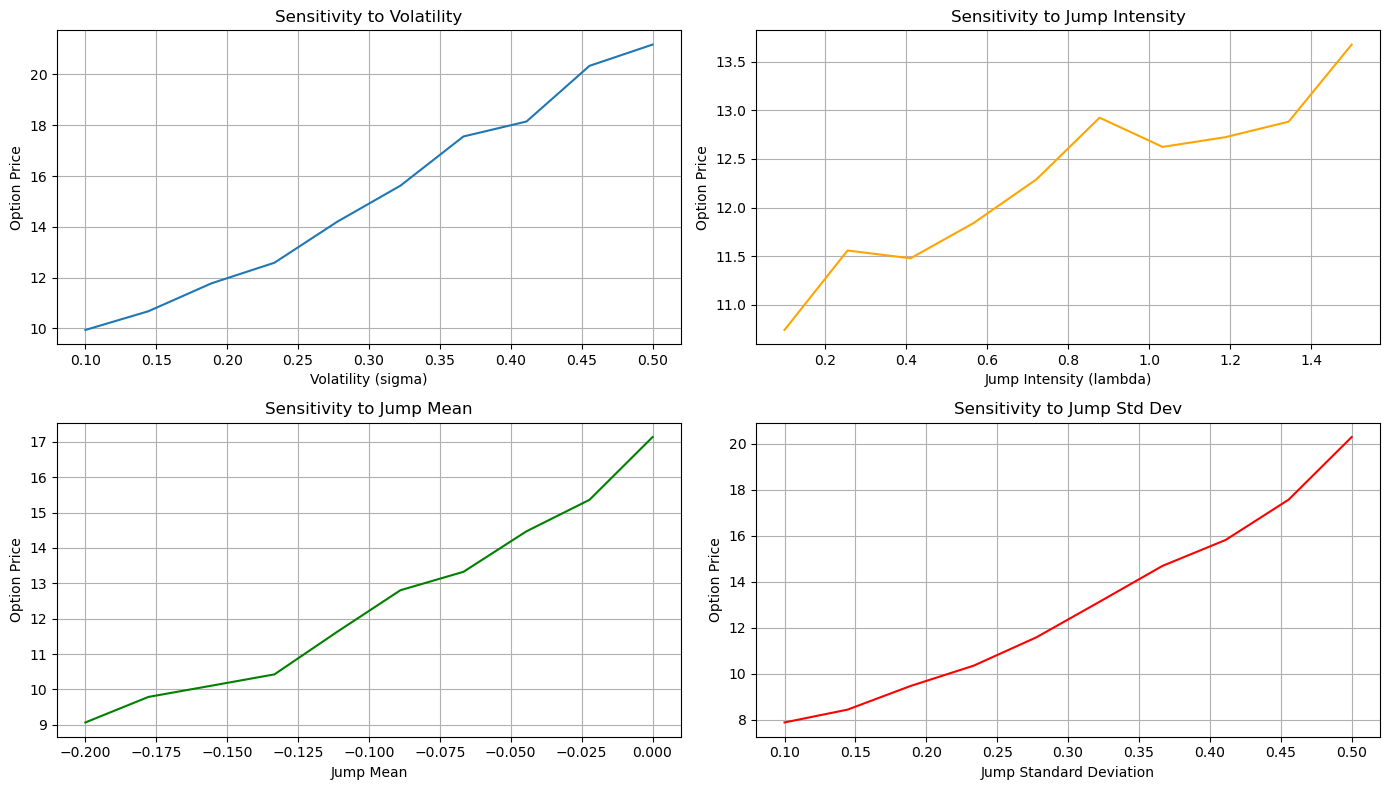

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Reuse the existing functions from the previous implementation

# Sensitivity Analysis Function
def sensitivity_analysis(S0, K, T, r, sigma, lamb, jump_mean, jump_sd, N, M):
    # Define the range of values for each parameter
    sigma_range = np.linspace(0.1, 0.5, 10)
    lambda_range = np.linspace(0.1, 1.5, 10)
    jump_mean_range = np.linspace(-0.2, 0, 10)
    jump_sd_range = np.linspace(0.1, 0.5, 10)
    
    # Placeholder for results
    sigma_sensitivity = []
    lambda_sensitivity = []
    jump_mean_sensitivity = []
    jump_sd_sensitivity = []

    # Vary sigma
    for s in sigma_range:
        price = price_option(S0, K, r, s, lamb, jump_mean, jump_sd, T, N, M, option_type="call")
        sigma_sensitivity.append(price)

    # Vary lambda
    for l in lambda_range:
        price = price_option(S0, K, r, sigma, l, jump_mean, jump_sd, T, N, M, option_type="call")
        lambda_sensitivity.append(price)

    # Vary jump mean
    for jm in jump_mean_range:
        price = price_option(S0, K, r, sigma, lamb, jm, jump_sd, T, N, M, option_type="call")
        jump_mean_sensitivity.append(price)

    # Vary jump sd
    for jsd in jump_sd_range:
        price = price_option(S0, K, r, sigma, lamb, jump_mean, jsd, T, N, M, option_type="call")
        jump_sd_sensitivity.append(price)

    # Plot the results
    plt.figure(figsize=(14, 8))

    plt.subplot(2, 2, 1)
    plt.plot(sigma_range, sigma_sensitivity, label='Sensitivity to Volatility')
    plt.xlabel('Volatility (sigma)')
    plt.ylabel('Option Price')
    plt.title('Sensitivity to Volatility')
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(lambda_range, lambda_sensitivity, label='Sensitivity to Jump Intensity', color='orange')
    plt.xlabel('Jump Intensity (lambda)')
    plt.ylabel('Option Price')
    plt.title('Sensitivity to Jump Intensity')
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(jump_mean_range, jump_mean_sensitivity, label='Sensitivity to Jump Mean', color='green')
    plt.xlabel('Jump Mean')
    plt.ylabel('Option Price')
    plt.title('Sensitivity to Jump Mean')
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(jump_sd_range, jump_sd_sensitivity, label='Sensitivity to Jump Std Dev', color='red')
    plt.xlabel('Jump Standard Deviation')
    plt.ylabel('Option Price')
    plt.title('Sensitivity to Jump Std Dev')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Example Usage
sensitivity_analysis(S0=100, K=100, T=1, r=0.05, sigma=0.2, lamb=0.75, jump_mean=-0.1, jump_sd=0.3, N=252, M=10000)
